In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate_nn as srnn
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')

In [2]:
L63_data_path = '../data/L63-trajectories'
N = 20000
train = np.load(f'{L63_data_path}/train.npy')[:, :N].astype(np.float32)
test = np.load(f'{L63_data_path}/test.npy')[:, :, :1000].astype(np.float32)

train_dataset = TensorDataset(torch.Tensor(train[:, :-1].T), torch.Tensor(train[:, 1:].T))
# test_dataset = test = np.load(f'{L63_data_path}/test.npy')[:, :, 1000]
train_dataloader = DataLoader(train_dataset, batch_size=int(N/10))#, shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

model = srnn.SurrogateModel_NN(3, 300, name='test_model', save_folder='../data/test/test_model')
x = torch.rand(3)

In [3]:
model.learn(train, epochs=1000, learning_rate=1e-3)

epoch: 0    loss: 14982488.000000     time elapsed=0.0252
epoch: 100    loss: 2064132.000000     time elapsed=1.9853
epoch: 200    loss: 1317448.000000     time elapsed=3.9450
epoch: 300    loss: 789920.062500     time elapsed=5.9222
epoch: 400    loss: 407898.250000     time elapsed=7.9420
epoch: 500    loss: 185691.562500     time elapsed=9.9636
epoch: 600    loss: 87067.570312     time elapsed=12.0007
epoch: 700    loss: 47568.292969     time elapsed=14.0817
epoch: 800    loss: 30201.255859     time elapsed=16.1338
epoch: 900    loss: 21192.628906     time elapsed=18.1756
Time taken by learn is 20.3297 seconds


In [4]:
tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(test[:500], error_threshold=0.05)

Time taken by compute_tau_f is 6.5913 seconds


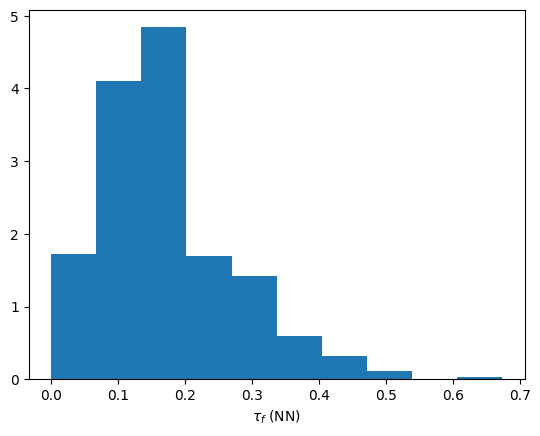

In [5]:
plt.hist(tau_f_se, density=True)
plt.xlabel(r'$\tau_f$ (NN)')
plt.savefig('../data/plots/tau_f_NN.png')
# plt.title(f'training_data_size={N}')

Time taken by compute_tau_f is 0.3587 seconds


Text(0.5, 1.0, 'training_data_size=20000')

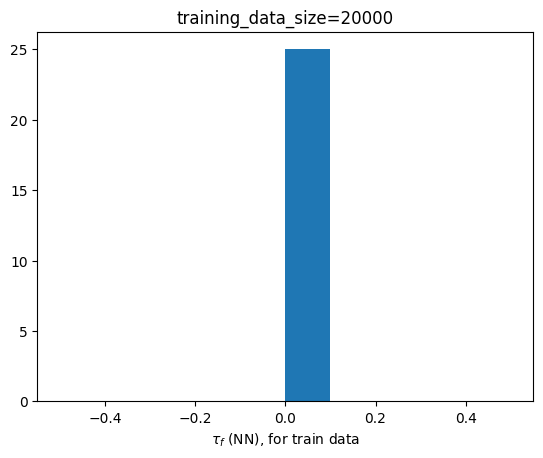

In [6]:
tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(train.T.reshape(-1, 3, 800))

plt.hist(tau_f_se)
plt.xlabel(r'$\tau_f$ (NN), for train data')
plt.title(f'training_data_size={N}')

In [7]:
tau_f_se.mean()

0.0

In [8]:
for batch, (X, y) in enumerate(train_dataloader):
    print(X, y)

tensor([[ -8.3611, -13.3140,  18.1467],
        [ -9.3860, -14.6547,  19.6255],
        [-10.4542, -15.8231,  21.5584],
        ...,
        [  2.0305,   3.3969,  15.7262],
        [  2.3213,   3.8728,  15.0634],
        [  2.6548,   4.4476,  14.4824]]) tensor([[ -9.3860, -14.6547,  19.6255],
        [-10.4542, -15.8231,  21.5584],
        [-11.5119, -16.6562,  23.9250],
        ...,
        [  2.3213,   3.8728,  15.0634],
        [  2.6548,   4.4476,  14.4824],
        [  3.0424,   5.1353,  13.9958]])
tensor([[ 3.0424,  5.1353, 13.9958],
        [ 3.4962,  5.9518, 13.6216],
        [ 4.0290,  6.9134, 13.3851],
        ...,
        [14.0473, 11.6263, 36.7345],
        [13.3525,  8.8866, 37.5703],
        [12.2934,  6.2659, 37.5103]]) tensor([[ 3.4962,  5.9518, 13.6216],
        [ 4.0290,  6.9134, 13.3851],
        [ 4.6544,  8.0351, 13.3216],
        ...,
        [13.3525,  8.8866, 37.5703],
        [12.2934,  6.2659, 37.5103],
        [10.9839,  4.0252, 36.7231]])
tensor([[10.9839,  4

In [9]:
train.T

array([[ -8.361066 , -13.313976 ,  18.146687 ],
       [ -9.38598  , -14.654672 ,  19.625534 ],
       [-10.454209 , -15.823077 ,  21.55841  ],
       ...,
       [ -8.537725 ,  -4.837833 ,  31.28254  ],
       [ -7.811937 ,  -4.2815824,  30.380886 ],
       [ -7.1350317,  -3.9159417,  29.39694  ]], dtype=float32)

In [10]:
import torch.nn.functional as F

In [11]:
l = nn.Linear(3, 300)

In [12]:
F.tanh(l(torch.rand(3)))

tensor([ 0.2399,  0.1630, -0.2064, -0.2504, -0.6211, -0.0100, -0.2785,  0.5487,
         0.4231, -0.0666,  0.1347, -0.5217, -0.2879,  0.4792,  0.4990,  0.0616,
        -0.0222, -0.5687,  0.3787, -0.0304,  0.2008, -0.5992,  0.2598,  0.1771,
         0.3574,  0.5211,  0.2215, -0.7270,  0.5737,  0.7249,  0.6424,  0.4828,
        -0.2355, -0.1060,  0.3220,  0.8777, -0.3843, -0.5152, -0.5356, -0.6559,
        -0.6998,  0.0286,  0.5810, -0.4653, -0.3102,  0.7824,  0.6723,  0.2205,
         0.5439,  0.3180,  0.0308, -0.0113,  0.8906, -0.0967, -0.3539,  0.6093,
         0.1040,  0.4707,  0.6002, -0.6631,  0.0592, -0.4144,  0.9223,  0.1886,
        -0.2677, -0.0627, -0.2207, -0.4844,  0.0656,  0.2494,  0.7033, -0.3881,
         0.5424,  0.4578,  0.6437,  0.0587,  0.8334, -0.7822,  0.7037,  0.0150,
         0.2402,  0.7457, -0.1363, -0.4039, -0.5995,  0.1804, -0.1622, -0.3110,
         0.6526, -0.1775, -0.0312, -0.6729,  0.3592, -0.4615, -0.2329, -0.6121,
         0.0448, -0.3432,  0.3811,  0.69

In [13]:
train_dataset

In [14]:
for batch, (X, y) in enumerate(train_dataloader):
    if batch == 1:
        print(X, y)

tensor([[ 3.0424,  5.1353, 13.9958],
        [ 3.4962,  5.9518, 13.6216],
        [ 4.0290,  6.9134, 13.3851],
        ...,
        [14.0473, 11.6263, 36.7345],
        [13.3525,  8.8866, 37.5703],
        [12.2934,  6.2659, 37.5103]]) tensor([[ 3.4962,  5.9518, 13.6216],
        [ 4.0290,  6.9134, 13.3851],
        [ 4.6544,  8.0351, 13.3216],
        ...,
        [13.3525,  8.8866, 37.5703],
        [12.2934,  6.2659, 37.5103],
        [10.9839,  4.0252, 36.7231]])


In [15]:
model.net(X)

tensor([[11.8769,  4.7864, 36.9993],
        [10.4681,  2.6845, 36.1822],
        [ 8.8928,  1.1093, 34.8442],
        ...,
        [-8.6995, -4.5736, 31.6629],
        [-7.9137, -3.9886, 30.6766],
        [-7.2174, -3.6321, 29.6445]], grad_fn=<MmBackward0>)

In [16]:
model.net(y)

tensor([[10.4681,  2.6845, 36.1822],
        [ 8.8928,  1.1093, 34.8442],
        [ 7.3334,  0.0953, 33.1316],
        ...,
        [-7.9137, -3.9886, 30.6766],
        [-7.2174, -3.6321, 29.6445],
        [-6.5901, -3.4648, 28.6045]], grad_fn=<MmBackward0>)

In [17]:
nn.MSELoss()(model.net(X), y)

tensor(0.2795, grad_fn=<MseLossBackward0>)

In [18]:
torch.mean(torch.sum((model.net(X)-y)**2, axis=1)**0.5)

tensor(0.5891, grad_fn=<MeanBackward0>)

In [19]:
242.81**2

58956.6961

In [20]:
attrs(model.net.W)

NameError: name 'attrs' is not defined

In [ ]:
seq = nn.Sequential(nn.Linear(3, 300, bias=True), nn.Tanh(), nn.Linear(300, 3, bias=False))

In [ ]:
for name, param in seq.named_parameters():
    if param.requires_grad:
        print(name, param.data)

In [ ]:
torch.sum(seq.state_dict()['2.weight']**2)

In [ ]:
fig, N, dt = plt.figure(figsize=(8, 8)), 500, 0.02
t = np.arange(0., N*dt, dt) / (1/0.91)
axs = [fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)]
dims = ['x', 'y', 'z']
u = np.load('{}/validation.npy'.format(L63_data_path)).astype(np.float32)
u = train
idx = [[4, 14, 18], [13, 17, 46], [13, 2, 31], ]
labels = ['good', 'medium', 'bad']
predicted = model.multistep_forecast(u[:, 0], N)
for i, ax in enumerate(axs):
    ax.plot(t, u[i, :N], label='truth')
    ax.plot(t, predicted[i, :N], label='network')
    ax.legend(loc='upper right')
    if i == len(dims)-1:
        ax.set_xlabel('t')
    ax.set_ylabel(dims[i])

In [ ]:
train.shape

In [ ]:
model = srnn.SurrogateModel_NN_multi(3, 50)
model.learn(train, epochs=10000, learning_rate=1e-3)

In [ ]:
fig, N, dt = plt.figure(figsize=(8, 8)), 500, 0.02
t = np.arange(0., N*dt, dt) / (1/0.91)
axs = [fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)]
dims = ['x', 'y', 'z']
u = np.load('{}/validation.npy'.format(L63_data_path)).astype(np.float32)
u = train
idx = [[4, 14, 18], [13, 17, 46], [13, 2, 31], ]
labels = ['good', 'medium', 'bad']
predicted = model.multistep_forecast(u[:, 0], N)
for i, ax in enumerate(axs):
    ax.plot(t, u[i, :N], label='truth')
    ax.plot(t, predicted[i, :N], label='network')
    ax.legend(loc='upper right')
    if i == len(dims)-1:
        ax.set_xlabel('t')
    ax.set_ylabel(dims[i])

In [ ]:
new_model = srnn.SurrogateModel_NN(3, 300, name='test_model', save_folder='../data/test/test_model')
new_model.net = torch.load(model.save_folder+f'/{model.name}_900')

In [ ]:
torch.load(model.save_folder+f'/{model.name}_900')(X) - new_model.net(X)